## Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines
https://www.drivendata.org/competitions/66/flu-shot-learning/

### Initial data exploration and modeling using benchmark code examples

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data - survey responses re knowledge and concerns about the flu, health behaviors, etc
features_df = pd.read_csv('./data/training_set_features.csv', index_col='respondent_id')
labels_df = pd.read_csv('./data/training_set_labels.csv', index_col='respondent_id')

In [3]:
features_df.shape

(26707, 35)

In [4]:
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [6]:
labels_df.shape

(26707, 2)

In [7]:
labels_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0


In [8]:
# check that the rows between the features and labels match up to ensure we don't have wrong labels for respondents
# if runs and nothing happens, no error messages, then all good.
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

### EDA

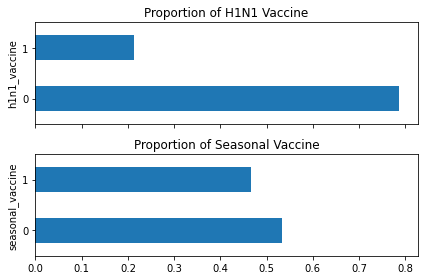

In [11]:
# check distribution of labels for the two target variables
fig, ax = plt.subplots(2, 1, sharex=True)

num_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine'].value_counts().div(num_obs).plot.barh(title='Proportion of H1N1 Vaccine', ax=ax[0]))
ax[0].set_ylabel('h1n1_vaccine')

(labels_df['seasonal_vaccine'].value_counts().div(num_obs).plot.barh(title='Proportion of Seasonal Vaccine', ax=ax[1]))
ax[1].set_ylabel('seasonal_vaccine')

fig.tight_layout()

About half the survey respondents received the seasonal vaccine but not as many the H1N1 vaccine, therefore the H1N1 vaccine target classes are relatively imbalanced. 

In [16]:
# check if the two target variables are independent 
pd.crosstab(
    labels_df['h1n1_vaccine'],
    labels_df['seasonal_vaccine'],
    margins = True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [17]:
# Phi Coefficient is the same as Pearson for two binary variables
(labels_df["h1n1_vaccine"].corr(labels_df["seasonal_vaccine"], method="pearson"))

0.37714265306144507

Phi coefficient (https://en.wikipedia.org/wiki/Phi_coefficient) is a measure of association of two binary variables.
The value of 0.3777 indicates a moderate positive correlation.  
Also evident in the cross-tabulation 
- Most people who got an H1N1 flu vaccine also got the seasonal flu vaccine. 
- A minority of people who got the seasonal vaccine got the H1N1 vaccine but they did get the H1N1 vaccine at a higher rate than those who did not get the seasonal vaccine.

In [18]:
# combine features and labels
full_df = features_df.join(labels_df)

In [19]:
full_df.shape

(26707, 37)

In [20]:
full_df.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0


In [22]:
# check correlation between different features and target variables

# h1n1_concern vs h1n1_vaccine
counts = full_df[['h1n1_concern', 'h1n1_vaccine']].groupby(['h1n1_concern', 'h1n1_vaccine']).size().unstack('h1n1_vaccine')
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


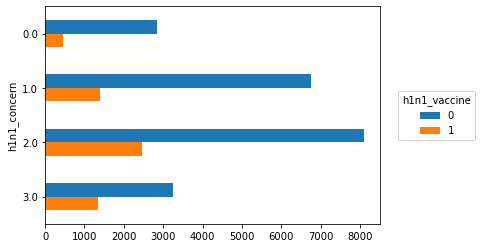

In [23]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(loc = 'center right', bbox_to_anchor=(1.3, 0.5), title='h1n1_vaccine')

In [24]:
# use the rate of vaccination instead to see
h1n1_concern_counts = counts.sum(axis='columns')
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


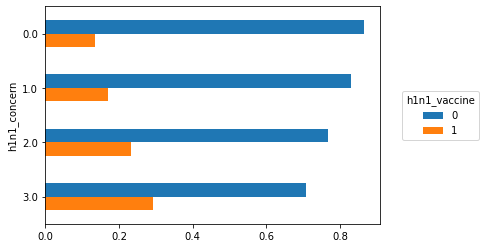

In [28]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title='h1n1_vaccine')

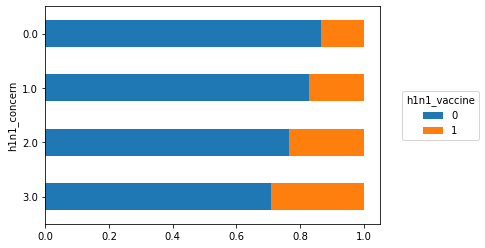

In [32]:
# convert to stacked, since these are proportions each pair will add up to 1
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title='h1n1_vaccine')

Evident here that the proportion of those getting a vaccine increased with increasing concern about h1n1.
Repeat this for the other variables.

In [47]:
def vaccination_rate_plot(feature, target, data, ax=None):
    """Stacked bar chart of vaccination rate for 'target' against 'feature'.
    Args:
        feature (string): column name of feature variable
        target (string): column name of target variable
        data (pandas dataframe): df containing the data
        ax (matplotlib axes object, optional): matplotlib axes object to attach plot to
    """
    counts = data[[feature, target]].groupby([feature, target]).size().unstack(target)
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    
    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

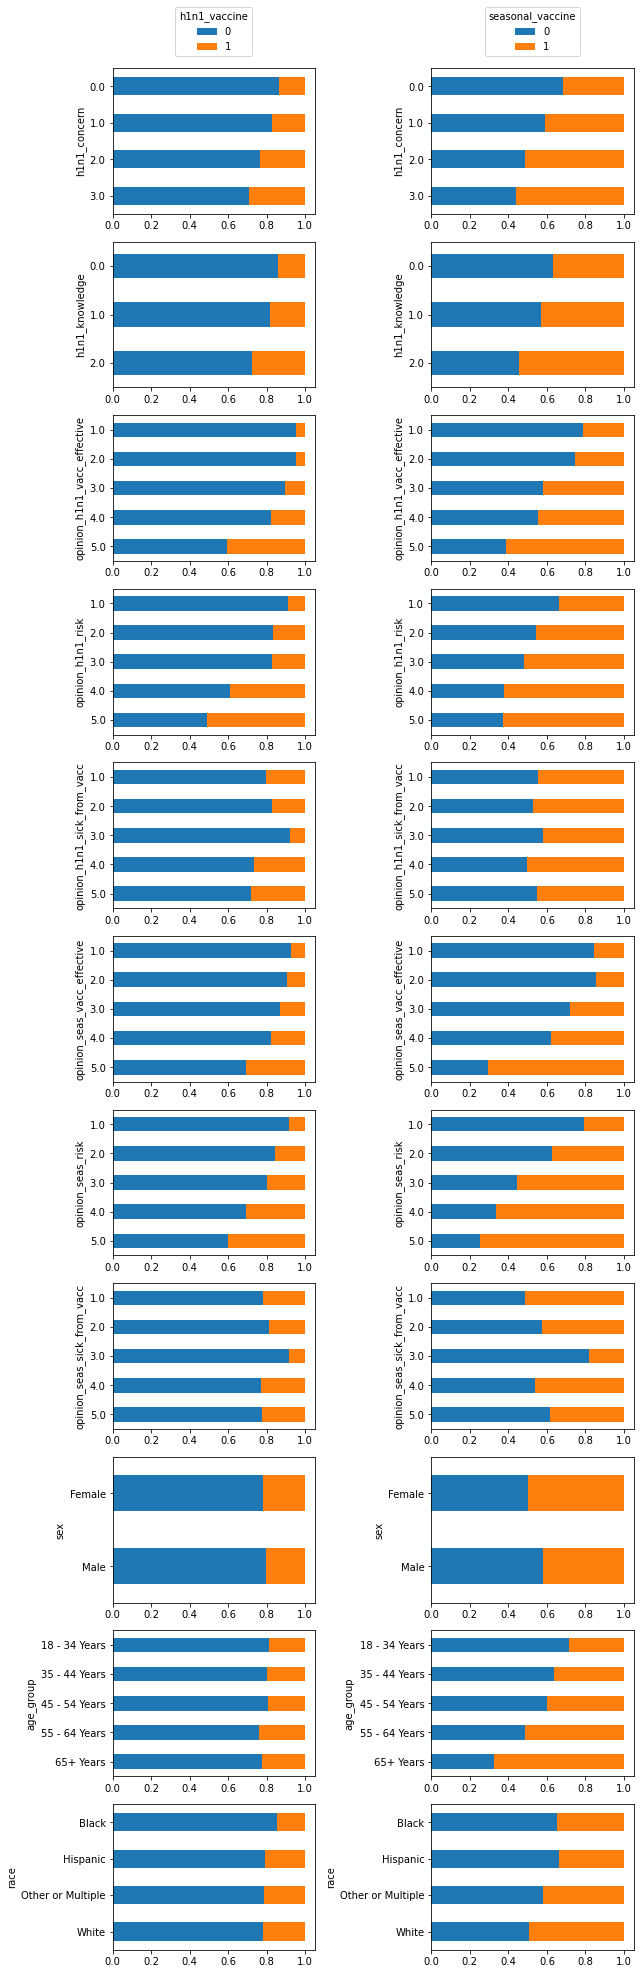

In [49]:
# loop through and plot the several features against the target variable
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race'
]

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9, len(cols_to_plot)*2.5))

for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'h1n1_vaccine', full_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', full_df, ax=ax[idx, 1])

ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')
fig.tight_layout()

## ML Models

### Logistic Regression

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve

In [51]:
RANDOM_SEED = 42

In [58]:
# train-test split wih random shuffle and stratify, since our h1n1_vaccine level was moderately imbalanced
# will split the provided training set into train and eval 
X_train, X_eval, y_train, y_eval = train_test_split(features_df, labels_df, test_size=0.33, shuffle=True, stratify=labels_df, 
                                                    random_state=RANDOM_SEED)

In [52]:
# start with only the numeric inputs
numeric_cols = features_df.columns[features_df.dtypes != 'object'].values
numeric_cols

array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object)

In [53]:
# use pipeline for preprocessing - scale and impute
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [54]:
# define estimators - start with sklearn default hyperparameters for LR of L2 (Ridge) regularization with C value of 1.
# use MultiOutputClassifier since we have two labels to predict (h1n1_vaccine and seasonal_vaccine)
estimators = MultiOutputClassifier(estimator=LogisticRegression(penalty='l2', C=1))

In [55]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

In [56]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'househo

In [60]:
%%time
# train the model

full_pipeline.fit(X_train, y_train)

# predict on evaluation set
# competition requirements is that we report probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

Wall time: 103 ms


[array([[0.9370031 , 0.0629969 ],
        [0.24217469, 0.75782531],
        [0.95826257, 0.04173743],
        ...,
        [0.18671901, 0.81328099],
        [0.9839001 , 0.0160999 ],
        [0.74724923, 0.25275077]]),
 array([[0.98139237, 0.01860763],
        [0.09231535, 0.90768465],
        [0.95327723, 0.04672277],
        ...,
        [0.09706328, 0.90293672],
        [0.58177139, 0.41822861],
        [0.56670581, 0.43329419]])]

In [62]:
print("test_probas[0].shape", preds[0].shape) #h1n1_vaccine
print("test_probas[1].shape", preds[1].shape) #seasonal_vaccine

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [63]:
# first column is for class 0 and second for class 1, so we want to grab the second column (index 1) for each of the two arrays
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1]
    }, index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6368,0.062997,0.018608
12566,0.757825,0.907685
13996,0.041737,0.046723
12769,0.225619,0.971052
16915,0.074570,0.249598


In [69]:
# the competition metric is the average between the two AUC values
roc_auc_score(y_eval, y_preds)

0.8317490240860407

In [67]:
# we have multilabel classification so let's make plot
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

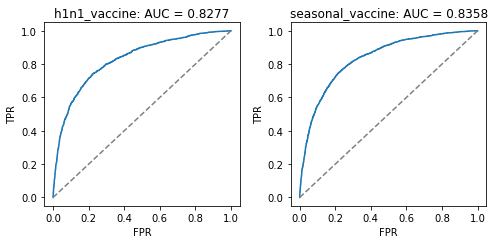

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Retrain on full dataset

In [70]:
%%time

full_pipeline.fit(features_df, labels_df)

Wall time: 93.5 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'househo

In [71]:
# now generate predictions for provided test dataset and then save in required submission format
test_features_df = pd.read_csv('./data/test_set_features.csv', index_col='respondent_id')

In [72]:
print(test_features_df.shape)
test_features_df.head(3)

(26708, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik


In [73]:
test_probas=full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.87280333, 0.12719667],
        [0.94475602, 0.05524398],
        [0.62906951, 0.37093049],
        ...,
        [0.80411015, 0.19588985],
        [0.9492446 , 0.0507554 ],
        [0.38421362, 0.61578638]]),
 array([[0.57359831, 0.42640169],
        [0.92876678, 0.07123322],
        [0.3626162 , 0.6373838 ],
        ...,
        [0.59872448, 0.40127552],
        [0.68003071, 0.31996929],
        [0.35787941, 0.64212059]])]

In [74]:
# read in submission format file
submission_df = pd.read_csv('./data/submission_format.csv', index_col='respondent_id')
submission_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7


In [75]:
# ensure rows are in the same order
np.testing.assert_array_equal(test_features_df.index.values, submission_df.index.values)

In [76]:
# save predictions to submissions dataframe
submission_df['h1n1_vaccine'] = test_probas[0][:, 1]
submission_df['seasonal_vaccine'] = test_probas[1][:, 1]

submission_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.127197,0.426402
26708,0.055244,0.071233
26709,0.370930,0.637384


In [77]:
submission_df.to_csv('ml_submission.csv', index=True)

- My score for this submission is: 0.8185
- Current Rank: 1042 of 4038 competitors

### Resources
- https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/
- https://scikit-learn.org/stable/
- https://www.health.ny.gov/publications/7227/